In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data collection and Pre Processing

In [2]:
df_mail = pd.read_csv("spam.csv")
df_mail

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
new_df = df_mail.where((pd.notnull(df_mail)),'')
new_df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
5,spam,FreeMsg Hey there darling it's been 3 week's n...,,,
6,ham,Even my brother is not like to speak with me. ...,,,
7,ham,As per your request 'Melle Melle (Oru Minnamin...,,,
8,spam,WINNER!! As a valued network customer you have...,,,
9,spam,Had your mobile 11 months or more? U R entitle...,,,


In [4]:
new_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1, inplace = True)
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
new_df.shape

(5572, 2)

# Data Visualization

In [6]:
new_df.loc[new_df["v1"]=="spam", "v1",]=0
new_df.loc[new_df["v1"]=="ham", "v1",]=1


<AxesSubplot:>

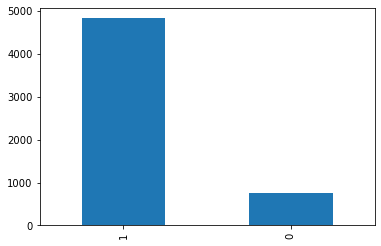

In [11]:
new_df['v1'].value_counts().plot(kind='bar')

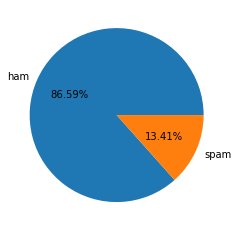

In [14]:
plt.pie(new_df['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [15]:
X = new_df['v2']
Y = new_df['v1']

In [16]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [17]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

# Splitting data into train and test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [20]:
#transform the text data to feature vectors that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert y_train and y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [21]:
print(X_train_features)

  (0, 742)	0.32207229533730536
  (0, 3962)	0.2411608243124387
  (0, 4279)	0.3893042361045832
  (0, 6580)	0.20305518394534605
  (0, 3375)	0.32207229533730536
  (0, 2116)	0.38519642807943744
  (0, 3126)	0.4403035234544808
  (0, 3251)	0.258880502955985
  (0, 3369)	0.21816477736422235
  (0, 4497)	0.2910887633154199
  (1, 4045)	0.380431198316959
  (1, 6850)	0.4306015894277422
  (1, 6397)	0.4769136859540388
  (1, 6422)	0.5652509076654626
  (1, 7420)	0.35056971070320353
  (2, 934)	0.4917598465723273
  (2, 2103)	0.42972812260098503
  (2, 3899)	0.40088501350982736
  (2, 2220)	0.413484525934624
  (2, 5806)	0.4917598465723273
  (3, 6121)	0.4903863168693604
  (3, 1595)	0.5927091854194291
  (3, 1838)	0.3708680641487708
  (3, 7430)	0.5202633571003087
  (4, 2523)	0.7419319091456392
  :	:
  (4452, 2116)	0.3092200696489299
  (4453, 1000)	0.6760129013031282
  (4453, 7250)	0.5787739591782677
  (4453, 1758)	0.45610005640082985
  (4454, 3019)	0.42618909997886
  (4454, 2080)	0.3809693742808703
  (4454, 3078

# Training the model
## Using logistic regression model

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train_features, Y_train)

LogisticRegression()

# Evaluating the trained model

In [24]:
#prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [25]:
print('Accuracy on training data :', accuracy_on_training_data)

Accuracy on training data : 0.9661207089970832


In [26]:
#prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [27]:
print('Accuracy on test data :', accuracy_on_test_data)

Accuracy on test data : 0.9623318385650225


# Building a predictive system

In [28]:
input_mail = ["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]

input_data_features = feature_extraction.transform(input_mail)

#making predictions

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0] == 1):
    print("Ham mail")

else:
     print("Spam mail") 

[0]
Spam mail
